In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
    sys.path.append("../")

In [18]:
def value_iteration_gambler(ph, theta=0.0001, discount_factor=1.0):
    """
    Args:
        ph: probability of the coin turningup heads
    Returns:
        policy: A deterministic policy, capital -> stakes mappi 
        V: state value function corresponds to probability of winning at each state
    """
    # reward for all states other than 100 is zero
    rewards = np.zeros(101)
    rewards[100] = 1
    
    # introduce dummy states 0, 100
    V = np.zeros(101)
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper Function to compute the value of all actions at a given state.
        Args:
            s: current state i.e. The gambler's capital.
            V: state value function. Vector that contains value at each state.
            rewards: Reward vector
        Returns:
            A: A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(101)
        stakes = range(1, min(s, 100 - s)+1) # actions are stakes in range 1, min(s, 100-s)
        for a in stakes:
            # rewards[s+a], rewards[s-a] are immediate rewards.
            # V[s+a], V[s-a] are values of the next states.
            # This is the core of the Bellman equation: The expected value of your action is 
            # the sum of immediate rewards and the value of the next state.
            A[a] = ph * (rewards[s+a] + discount_factor * V[s+a]) + (1-ph) * (rewards[s-a] + discount_factor * V[s-a])
        return A
    
    while True:
        # stopping condition
        delta = 0
        # for each state (i.e. capital)
        for s in range(1, 100):
            # look ahead and fetch action values
            action_values = one_step_lookahead(s, V, rewards)
            # get the best action value from current state
            best_action_value = np.max(action_values)
            
            delta = np.maximum(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value
        if delta < theta:
            break
    
    policy = np.zeros(100)
    for s in range(1, 100):
        # one step lookahead
        action_values = one_step_lookahead(s, V, rewards)
        best_action = np.argmax(action_values)
        policy[s] = best_action
    return policy, V

In [35]:
policy, V = value_iteration_gambler(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(V)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02

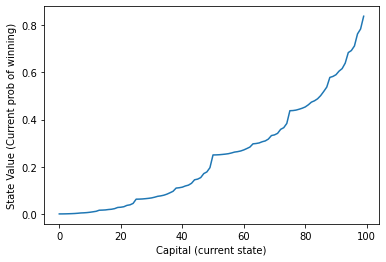

In [36]:
# plots
x = range(100)
y = V[:100]

plt.plot(x, y)
plt.xlabel("Capital (current state)")
plt.ylabel("State Value (Current prob of winning)")
plt.show()

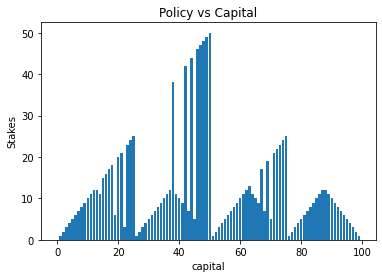

In [37]:
x = range(100)
y = policy

plt.bar(x, y)
plt.xlabel("capital")
plt.ylabel("Stakes")
plt.title("Policy vs Capital")
plt.show()

In [38]:
policy, V = value_iteration_gambler(0.55)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(V)
print("")

Optimized Policy:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

Optimized Value Function:
[0.         0.17907988 0.3256451  0.44562338 0.54386112 0.62432055
 0.69024101 0.74427075 0.78857479 0.82492306 0.8547625  0.87927601
 0.89943065 0.916017   0.92968144 0.94095243 0.95026207 0.95796371
 0.96434629 0.96964617 0.97405667 0.97773597 0.98081353 0.98339531
 0.9855681  0.98740299 0.98895822 0.9902816  0.99141231 0.99238257
 0.99321882 0.99394285 0.99457258 0.99512281 0.99560577 0.99603155
 0.99640856 0.99674375 0.99704294 0.99731096 0.9975519  0.99776916
 0.99796564 0.99814377 0.99830564 0.99845302 0.99858745 0.99871025
 0.99882255 0.99892537 0.99901957 0.99910594 0.99918515 0.99925782
 0.99932449 0.99938566 0.99944178 0.99949324 0

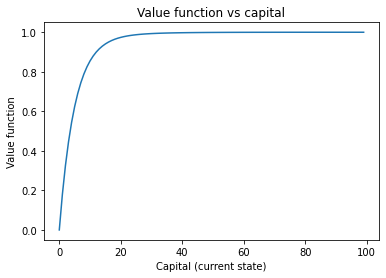

In [41]:
x = range(100)
y = V[:100]
plt.plot(x, y)
plt.xlabel("Capital (current state)")
plt.ylabel("Value function")
plt.title("Value function vs capital")
plt.show()

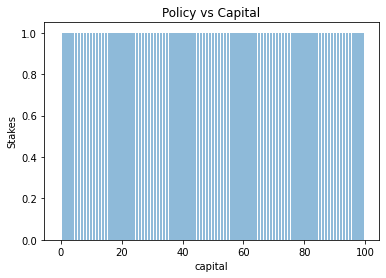

In [40]:
x = range(100)
y = policy

plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel("capital")
plt.ylabel("Stakes")
plt.title("Policy vs Capital")
plt.show()